In [1]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()
from hand_to_mouth import *

In [2]:
# Printing the reference income
# Note that it is first wage, then high benefit, medium benefit, low benefit
print(model.par.ref_income_u)

[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7
 0.7 0.7 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]


In [3]:
# Printing the reference in period 35
print(model.par.r_u[35])

0.4


In [4]:
#Printing the reference point matrix
print(model.par.r_e)

[[1.   1.   1.   ... 1.   1.   1.  ]
 [1.   0.97 0.97 ... 1.   1.   1.  ]
 [1.   0.97 0.94 ... 1.   1.   1.  ]
 ...
 [1.   0.97 0.94 ... 1.   1.   1.  ]
 [1.   0.97 0.94 ... 0.94 1.   1.  ]
 [1.   0.97 0.94 ... 0.88 0.94 1.  ]]


In [5]:
unemployed_ss(model.par)

1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0

(0.428081644650836, -0.004246656989725896)

In [6]:
solve_search_effort(model.par)


1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0

(array([0.28069394, 0.28061628, 0.28161656, 0.28405872, 0.28845813,
        0.29557051, 0.30655462, 0.32329428, 0.34910523, 0.39053603,
        0.38763879, 0.38511523, 0.38314149, 0.3819768 , 0.38201052,
        0.38384281, 0.38843057, 0.39737175, 0.41351794, 0.44249706,
        0.44004476, 0.43770154, 0.43550303, 0.43349232, 0.43172012,
        0.43024334, 0.42912009, 0.42839711, 0.42808165, 0.42808165,
        0.42808165, 0.42808165, 0.42808165, 0.42808165, 0.42808165,
        0.42808165, 0.42808165, 0.42808165, 0.42808165, 0.42808165,
        0.42808164]),
 array([-2.83000364, -2.52321526, -2.24527845, -2.00034513, -1.79372131,
        -1.63240731, -1.52601606, -1.48843798, -1.54111193, -1.72017204,
        -2.09459785, -1.82542473, -1.57423271, -1.34416161, -1.13938264,
        -0.96561231, -0.83097497, -0.74753702, -0.73425396, -0.82324741,
        -1.07527412, -0.90857969, -0.75101639, -0.60373725, -0.46809683,
        -0.34568388, -0.23834851, -0.1482089 , -0.07760597, -0.028939

1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
4.2980814913570855
[0.4  0

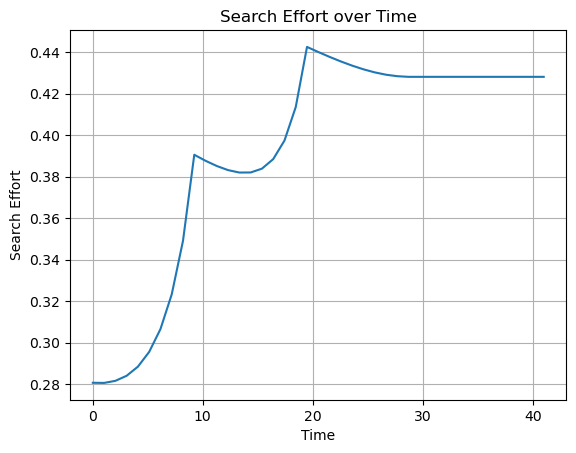

In [7]:
# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
search_effort,value_function = solve_search_effort(model.par)
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, search_effort)
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()
